An example notebook on how to use the PokerStarsCollection and PokerStarsGame classes
---

In [1]:
from pokerstars import PokerStarsCollection
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

A PokerStarsCollection is a collection of PokerStarsGame's that occur in a single session. The encoding needs to be changed for windows/linux otherwise various errors will occur.

In [2]:
poker_session = PokerStarsCollection(file="./multigame_example_anonymized.txt",
                                     encoding=None,
                                     working_dir="./",
                                     hero="Bobson_Dugnutt")

Games can be accessed from the `games_data` attribute of `PokerStarsCollection`. To get a complete dataframe, use the `get_full_data()` method.

In [3]:
single_game = poker_session.games_data[4].get_full_data()
print(single_game)

        Player Name       Stakes Max Players Game Type        Date      Time  \
0   Sleve_McDichael  $0.01/$0.02       9-max    Normal  2021/02/10  15:48:37   
1  Darryl_Archideld  $0.01/$0.02       9-max    Normal  2021/02/10  15:48:37   
2    Willie_Dustice  $0.01/$0.02       9-max    Normal  2021/02/10  15:48:37   
3    Bobson_Dugnutt  $0.01/$0.02       9-max    Normal  2021/02/10  15:48:37   
4     Scott_Dourque  $0.01/$0.02       9-max    Normal  2021/02/10  15:48:37   
5         Mike_Truk  $0.01/$0.02       9-max    Normal  2021/02/10  15:48:37   
6      Tim_Sandaele  $0.01/$0.02       9-max    Normal  2021/02/10  15:48:37   
7    Karl_Dandleton  $0.01/$0.02       9-max    Normal  2021/02/10  15:48:37   
8     Todd_Bonzalez  $0.01/$0.02       9-max    Normal  2021/02/10  15:48:37   

      Game Code   Table Name  Chips ($)  Chips (BB)  ... Pre-Flop Raise  \
0  223646511216  Ornamenta V       2.10       105.0  ...          False   
1  223646511216  Ornamenta V       2.00       100

Currently, a full dataframe is saved in the `full_data` attribute of `PokerStarsCollection`.

In [4]:
full_data = poker_session.full_data
print(full_data)

          Player Name       Stakes Max Players Game Type        Date  \
0     Sleve_McDichael  $0.01/$0.02       9-max    Normal  2021/02/10   
1    Darryl_Archideld  $0.01/$0.02       9-max    Normal  2021/02/10   
2      Willie_Dustice  $0.01/$0.02       9-max    Normal  2021/02/10   
3      Bobson_Dugnutt  $0.01/$0.02       9-max    Normal  2021/02/10   
4       Scott_Dourque  $0.01/$0.02       9-max    Normal  2021/02/10   
..                ...          ...         ...       ...         ...   
121     Scott_Dourque  $0.01/$0.02       9-max    Normal  2021/02/10   
122         Mike_Truk  $0.01/$0.02       9-max    Normal  2021/02/10   
123      Tim_Sandaele  $0.01/$0.02       9-max    Normal  2021/02/10   
124    Karl_Dandleton  $0.01/$0.02       9-max    Normal  2021/02/10   
125     Todd_Bonzalez  $0.01/$0.02       9-max    Normal  2021/02/10   

         Time     Game Code   Table Name  Chips ($)  Chips (BB)  ...  \
0    15:46:32  223646450352  Ornamenta V       2.03       101.5

From this full dataframe, all pandas functionality can be used. For example filtering by hands in which anyone 3-bet pre-flop:

In [20]:
three_bets = full_data[(full_data["Pre-Flop 3-Bet"] == True)]
three_bets

,Player Name,Stakes,Max Players,Game Type,Date,Time,Game Code,Table Name,Chips ($),Chips (BB),...,Check Turn,Turn Raise,Turn Raise Size,Called Turn Raise,Called Turn Raise size,Fold to Turn Raise,River Raise,River Raise Size,Called River Raise,Called River Raise size
48,Bobson_Dugnutt,$0.01/$0.02,9-max,Normal,2021/02/10,15:50:43,223646572650,Ornamenta V,2.14,107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Todd_Bonzalez,$0.01/$0.02,9-max,Normal,2021/02/10,15:51:33,223646597506,Ornamenta V,1.47,73.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Darryl_Archideld,$0.01/$0.02,9-max,Normal,2021/02/10,15:52:34,223646627150,Ornamenta V,2.00,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filters can be combined as follows:

In [21]:
bobson_raise = full_data[(full_data["Player Name"] == "Bobson_Dugnutt") & (full_data["Pre-Flop Raise"] == True)]
bobson_raise

,Player Name,Stakes,Max Players,Game Type,Date,Time,Game Code,Table Name,Chips ($),Chips (BB),...,Check Turn,Turn Raise,Turn Raise Size,Called Turn Raise,Called Turn Raise size,Fold to Turn Raise,River Raise,River Raise Size,Called River Raise,Called River Raise size
21,Bobson_Dugnutt,$0.01/$0.02,9-max,Normal,2021/02/10,15:48:06,223646496026,Ornamenta V,1.95,97.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Bobson_Dugnutt,$0.01/$0.02,9-max,Normal,2021/02/10,15:49:31,223646537550,Ornamenta V,2.00,100.0,...,NaN,True,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,Bobson_Dugnutt,$0.01/$0.02,9-max,Normal,2021/02/10,15:56:47,223646742573,Ornamenta V,1.27,63.5,...,NaN,False,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN


A very useful application of this filtering of data is to plot different hand matrices to get a clear illustration of how often different hands are played in different situtations.

In [18]:
def plot_hand_matrix(hand_counts):
    # uses df counts to plot a heatmap in a hand matrix
    def translate_hand(hand=None):
        if hand[-1] == "s":
            new_hand = hand[0] + hand[1]
        elif hand[-1] == "o":
            new_hand = hand[1] + hand[0]
        else:
            return hand
        return new_hand

    list_of_rankings = ["A", "K", "Q", "J", "T", "9", "8", "7", "6", "5", "4", "3", "2"]
    data_counter = {a: {b: 0  for b in list_of_rankings} for a in list_of_rankings}
    for x, y in zip(list(hand_counts.index), hand_counts):
        x = x.replace(" ", "")
        if x[0] == x[2]:
            counter_key = x[0] + x[2]
        elif x[1] == x[3]:
            counter_key = x[0] + x[2]
        else:
            counter_key = x[2] + x[0]
        data_counter[counter_key[0]][counter_key[1]] += y

    heatmap_data = pd.DataFrame.from_dict(data_counter)

    plt.figure(figsize=(12, 12))
    all_ranking_combos = []
    for x in list_of_rankings:
        row = []
        for y in list_of_rankings:
            if list_of_rankings.index(x) < list_of_rankings.index(y):
                row.append(x + y + "s")
            elif list_of_rankings.index(x) > list_of_rankings.index(y):
                row.append(y + x + "o")
            else:
                row.append(x + y)
        all_ranking_combos.append(row)

    rankings = pd.DataFrame(all_ranking_combos)
    sns.heatmap(heatmap_data, annot=all_ranking_combos, fmt = '', xticklabels=False,
                yticklabels=False, cmap=plt.cm.get_cmap("magma"), linewidths=2.5, linecolor = (0.2, 0.2, 0.2),
                annot_kws={"fontsize": 20}, cbar=False)


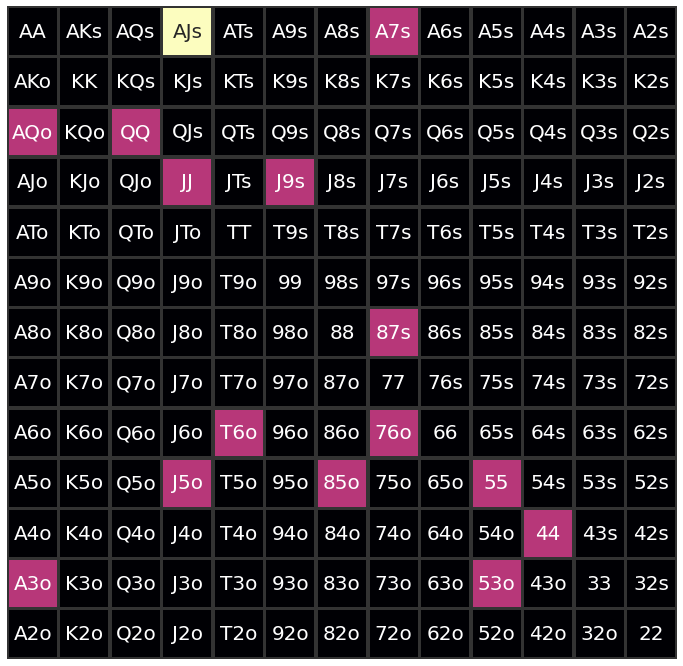

In [19]:
plot_hand_matrix(full_data["Player Cards"].value_counts())